# <center> HEART DISEASE - Exploration des données </center>

# Présentation des variables


    
D'abord rappelons ce qu'est l'angiographie coronarienne (ou coronarographie) : c'est une technique utilisée en imagerie médicale qui permet d'observer la circulation sanguin dans le coeur de façon distincte.


1. `age` : âge de la personne référée (valeur quantitative discrete)

2. `sex` : sexe de la personne référée (variable qualitative binaire : 1 pour homme, 0 pour femme)

3. `cp` : douleur thoracique (variable qualitative)
    - Valeur 1: (angineuse typique)
    - Valeur 2: angineuse atypique
    - Valeur 3: douleur non anginale
    - Valeur 4: asymptomatique

4. `trestbps` : tension artérielle au repos (en mm Hg à l'admission à l'hôpital) (variable quantitative discrete)

5. `chol` : cholestérol sérique en mg / dl #taux de cholestérol (variable quantitative discrete)

6. `fbs` : (glycémie à jeun> 120 mg / dl) #Taux de glycémie (variable quantitative discrete)

7. `restecg` : Résulat d'une ECG utilisée pour évaluer les maladies cardiovasculaires connues, pour détecter les maladies cardiovasculaires non diagnostiquées auparavant et pour fournir une norme de référence par rapport à laquelle mesurer les changements dans la période postopératoire. (variable qualitative)

    Resultats : 

	-- Value 0: normal
    -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST 
                    elevation or depression of > 0.05 mV)
    -- Value 2: showing probable or definite left ventricular hypertrophy
                    by Estes' criteria

8. `thalach` : Mesure de La Fréquence cardiaque maximale (par minute) (variable quantitative discrete)

9. `exang` : Angine induite par l'épreuve d'effort (variable qualitative)

10. `ST depression` :  Le segment ST d'une EGC anormalement plus bas que la normale mesuré en mm. (variable quantitative discrete)

11. `slope` : c'est la pente du segment ST (electro cardiogramme). Plus cette dernière est élevée, plus le ST depression est possible (variable qualitative)

12. `ca` : c'est le nombre de vaisseaux principaux (0-3) coloriés par la fluoroscopie (variable qualitative)

13. `thal` : sert à évaluer la qualité de l'irrigation par les artères, les coronaires grâce au thallium 201 (un traceur radioactif). (variable qualitative)
Prend trois valeurs (3 = normal, 6 = défaut fixe, 7 = défaut réversible)

14. `num (the predicted attribute)` : Diagnostique d'une maladie cardiaque (selon le statut indiqué par l'angiographie). (variable qualitative)
    - Valeurs : 0  = absence de maladie cardiaque
    - 1 - 2 - 3 - 4 = presence de maladie cardiaque selon le quantile de probabilité selectionné. 
L'angiogramme coronaire considère comme anormal si le rétrécissement du diamètre dès artères est supérieur à 50%


Des modifications ont été apporté au niveau de notre ancien code pour les différents dataframes de chaque région (cleve, va, hungarian, switzerland). Voici nos nouveaux dataframes :

Voici les datasets :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Jeu de données Cleveland

In [2]:
# df avec NaN
df_cleveland = pd.read_csv("processed.cleveland.data", delimiter = ",")
df_cleveland.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
df_cleveland = df_cleveland.replace('?',np.nan)
df_cleveland['ca'] = pd.to_numeric(df_cleveland['ca'])
df_cleveland['thal'] = pd.to_numeric(df_cleveland['thal'])

df_cleveland['source'] = 'cleve'
df_cleveland

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,source
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,cleve
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,cleve
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,cleve
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,cleve
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0,cleve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,cleve
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,cleve
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,cleve
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,cleve


In [3]:
# Pourcentage missing values df_cleveland :
percent_missing = df_cleveland.isnull().sum() * 100 / len(df_cleveland)
missing_value_df_cleveland = pd.DataFrame({'column_name': df_cleveland.columns,
                                 'percent_missing': percent_missing})
missing_value_df_cleveland

,column_name,percent_missing
age,age,0.000000
sex,sex,0.000000
cp,cp,0.000000
trestbps,trestbps,0.000000
chol,chol,0.000000
fbs,fbs,0.000000
restecg,restecg,0.000000
thalach,thalach,0.000000
exang,exang,0.000000
oldpeak,oldpeak,0.000000


In [4]:
# df sans NaN, remplacés par 0
df_cleveland = df_cleveland.replace(np.nan, 0)
df_cleveland

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,source
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,cleve
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,cleve
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,cleve
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,cleve
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0,cleve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,cleve
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,cleve
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,cleve
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,cleve


### Jeu de données Long Beach (va)

In [5]:
df_va = pd.read_csv('processed.va.data', delimiter = ',')
df_va.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
df_va = df_va.replace('?',np.nan)

df_va['source'] = 'va'
df_va

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,source
0,44,1,4,130,209,0,1,127,0,0,NaN,NaN,NaN,0,va
1,60,1,4,132,218,0,1,140,1,1.5,3,NaN,NaN,2,va
2,55,1,4,142,228,0,1,149,1,2.5,1,NaN,NaN,1,va
3,66,1,3,110,213,1,2,99,1,1.3,2,NaN,NaN,0,va
4,66,1,3,120,0,0,1,120,0,-0.5,1,NaN,NaN,0,va
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,54,0,4,127,333,1,1,154,0,0,NaN,NaN,NaN,1,va
195,62,1,1,NaN,139,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0,va
196,55,1,4,122,223,1,1,100,0,0,NaN,NaN,6,2,va
197,58,1,4,NaN,385,1,2,NaN,NaN,NaN,NaN,NaN,NaN,0,va


In [6]:
mask = df_va.columns != 'source'
cols = df_va.columns[mask]
for i in cols:
    df_va[i] = pd.to_numeric(df_va[i], errors = 'coerce')

In [7]:
# Pourcentage missing values df_va :
percent_missing = df_va.isnull().sum() * 100 / len(df_va)
missing_value_df_va = pd.DataFrame({'column_name': df_va.columns,
                                 'percent_missing': percent_missing})
missing_value_df_va

,column_name,percent_missing
age,age,0.000000
sex,sex,0.000000
cp,cp,0.000000
trestbps,trestbps,28.140704
chol,chol,3.517588
fbs,fbs,3.517588
restecg,restecg,0.000000
thalach,thalach,26.633166
exang,exang,26.633166
oldpeak,oldpeak,28.140704


### Jeu de données Hongrie

In [8]:
df_hungarian = pd.read_csv('processed.hungarian.data', delimiter = ',')
df_hungarian.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
df_hungarian = df_hungarian.replace('?',np.nan)

df_hungarian['source'] = 'hung'
df_hungarian

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,source
0,29,1,2,120,243,0,0,160,0,0.0,NaN,NaN,NaN,0,hung
1,29,1,2,140,NaN,0,0,170,0,0.0,NaN,NaN,NaN,0,hung
2,30,0,1,170,237,0,1,170,0,0.0,NaN,NaN,6,0,hung
3,31,0,2,100,219,0,1,150,0,0.0,NaN,NaN,NaN,0,hung
4,32,0,2,105,198,0,0,165,0,0.0,NaN,NaN,NaN,0,hung
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,52,1,4,160,331,0,0,94,1,2.5,NaN,NaN,NaN,1,hung
289,54,0,3,130,294,0,1,100,1,0.0,2,NaN,NaN,1,hung
290,56,1,4,155,342,1,0,150,1,3.0,2,NaN,NaN,1,hung
291,58,0,2,180,393,0,0,110,1,1.0,2,NaN,7,1,hung


In [9]:
mask = df_hungarian.columns != 'source'
cols = df_hungarian.columns[mask]
for i in cols:
    df_hungarian[i] = pd.to_numeric(df_hungarian[i], errors = 'coerce')

In [10]:
# Pourcentage missing values df_hungarian :
percent_missing = df_hungarian.isnull().sum() * 100 / len(df_hungarian)
missing_value_df_hungarian = pd.DataFrame({'column_name': df_hungarian.columns,
                                 'percent_missing': percent_missing})
missing_value_df_hungarian

,column_name,percent_missing
age,age,0.000000
sex,sex,0.000000
cp,cp,0.000000
trestbps,trestbps,0.341297
chol,chol,7.849829
fbs,fbs,2.730375
restecg,restecg,0.341297
thalach,thalach,0.341297
exang,exang,0.341297
oldpeak,oldpeak,0.000000


### Jeu de données Suisse

In [11]:
df_swi = pd.read_csv('processed.switzerland.data', delimiter = ',')
df_swi.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
df_swi = df_swi.replace('?',np.nan)

df_swi['source'] = 'swi'
df_swi

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,source
0,34,1,4,115,0,NaN,NaN,154,0,.2,1,NaN,NaN,1,swi
1,35,1,4,NaN,0,NaN,0,130,1,NaN,NaN,NaN,7,3,swi
2,36,1,4,110,0,NaN,0,125,1,1,2,NaN,6,1,swi
3,38,0,4,105,0,NaN,0,166,0,2.8,1,NaN,NaN,2,swi
4,38,0,4,110,0,0,0,156,0,0,2,NaN,3,1,swi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,70,1,4,115,0,0,1,92,1,0,2,NaN,7,1,swi
118,70,1,4,140,0,1,0,157,1,2,2,NaN,7,3,swi
119,72,1,3,160,0,NaN,2,114,0,1.6,2,2,NaN,0,swi
120,73,0,3,160,0,0,1,121,0,0,1,NaN,3,1,swi


In [12]:
mask = df_swi.columns != 'source'
cols = df_swi.columns[mask]
for i in cols:
    df_swi[i] = pd.to_numeric(df_swi[i], errors = 'coerce')

In [13]:
# Pourcentage missing values df_swi :
percent_missing = df_swi.isnull().sum() * 100 / len(df_swi)
missing_value_df_swi = pd.DataFrame({'column_name': df_swi.columns,
                                 'percent_missing': percent_missing})
missing_value_df_swi

,column_name,percent_missing
age,age,0.000000
sex,sex,0.000000
cp,cp,0.000000
trestbps,trestbps,1.639344
chol,chol,0.000000
fbs,fbs,60.655738
restecg,restecg,0.819672
thalach,thalach,0.819672
exang,exang,0.819672
oldpeak,oldpeak,4.918033


### Jeu de données global : result

In [14]:
df_conc = [df_cleveland, df_hungarian, df_swi, df_va]
result = pd.concat(df_conc, ignore_index = True)
result

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,source
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,cleve
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,cleve
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,cleve
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,cleve
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0,cleve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,54.0,0.0,4.0,127.0,333.0,1.0,1.0,154.0,0.0,0.0,NaN,NaN,NaN,1,va
912,62.0,1.0,1.0,NaN,139.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0,va
913,55.0,1.0,4.0,122.0,223.0,1.0,1.0,100.0,0.0,0.0,NaN,NaN,6.0,2,va
914,58.0,1.0,4.0,NaN,385.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0,va


In [15]:
mask = result.columns != 'source'
cols = result.columns[mask]
for i in cols:
    result[i] = pd.to_numeric(result[i], errors = 'coerce')

In [16]:
# Pourcentage missing values result :
percent_missing = result.isnull().sum() * 100 / len(result)
missing_value_result = pd.DataFrame({'column_name': result.columns,
                                 'percent_missing': percent_missing})
missing_value_result

,column_name,percent_missing
age,age,0.000000
sex,sex,0.000000
cp,cp,0.000000
trestbps,trestbps,6.441048
chol,chol,3.275109
fbs,fbs,9.716157
restecg,restecg,0.218341
thalach,thalach,6.004367
exang,exang,6.004367
oldpeak,oldpeak,6.768559


# Visualisation des données

### CLEVELAND

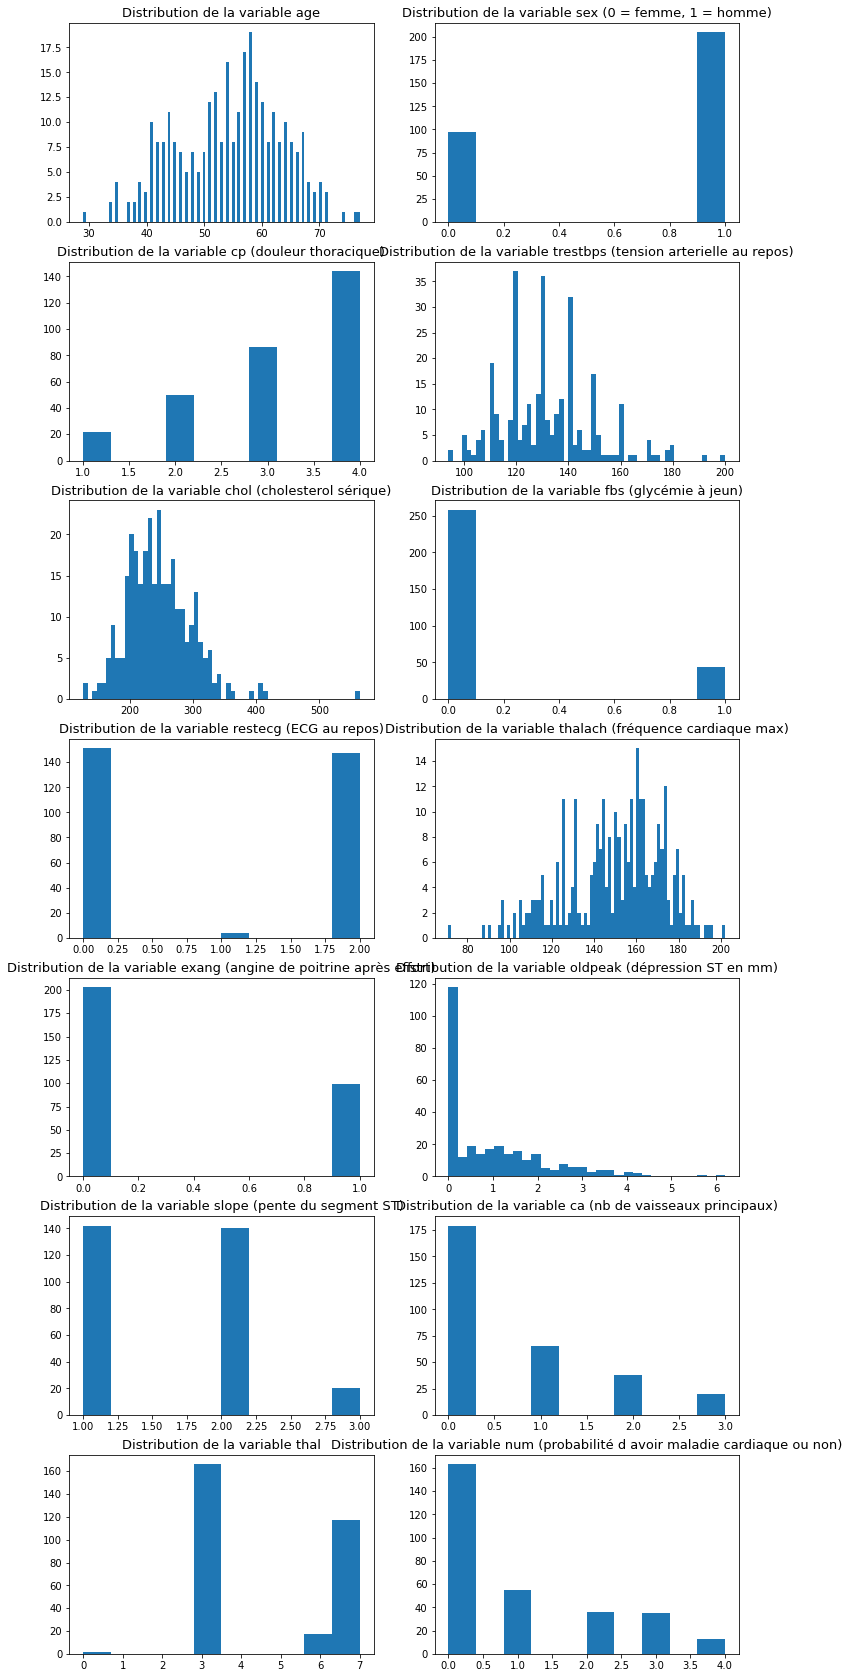

In [17]:
# Distribution des variables (histogramme) :

fig, axes = plt.subplots(7,2)
fig.set_size_inches(12,12)
fig.set_figheight(30)

axes[0,0].hist(df_cleveland['age'], bins = 95)
axes[0,0].set_title('Distribution de la variable age', fontsize = 13)

axes[0,1].hist(df_cleveland['sex'])
axes[0,1].set_title('Distribution de la variable sex (0 = femme, 1 = homme)', fontsize = 13)

axes[1,0].hist(df_cleveland['cp'])
axes[1,0].set_title('Distribution de la variable cp (douleur thoracique)', fontsize = 13)

axes[1,1].hist(df_cleveland['trestbps'], bins = 60)
axes[1,1].set_title('Distribution de la variable trestbps (tension arterielle au repos)', fontsize = 13)

axes[2,0].hist(df_cleveland['chol'], bins = 60)
axes[2,0].set_title('Distribution de la variable chol (cholesterol sérique)', fontsize = 13)

axes[2,1].hist(df_cleveland['fbs'])
axes[2,1].set_title('Distribution de la variable fbs (glycémie à jeun)', fontsize = 13)

axes[3,0].hist(df_cleveland['restecg'])
axes[3,0].set_title('Distribution de la variable restecg (ECG au repos)', fontsize = 13)

axes[3,1].hist(df_cleveland['thalach'], bins = 90)
axes[3,1].set_title('Distribution de la variable thalach (fréquence cardiaque max)', fontsize = 13)

axes[4,0].hist(df_cleveland['exang'])
axes[4,0].set_title('Distribution de la variable exang (angine de poitrine après effort)', fontsize = 13)

axes[4,1].hist(df_cleveland['oldpeak'], bins = 30)
axes[4,1].set_title('Distribution de la variable oldpeak (dépression ST en mm)', fontsize = 13)

axes[5,0].hist(df_cleveland['slope'])
axes[5,0].set_title('Distribution de la variable slope (pente du segment ST)', fontsize = 13)

axes[5,1].hist(df_cleveland['ca'].dropna())
axes[5,1].set_title('Distribution de la variable ca (nb de vaisseaux principaux)', fontsize = 13)

axes[6,0].hist(df_cleveland['thal'].dropna())
axes[6,0].set_title('Distribution de la variable thal', fontsize = 13)

axes[6,1].hist(df_cleveland['num'])
axes[6,1].set_title('Distribution de la variable num (probabilité d avoir maladie cardiaque ou non)', fontsize = 13)   
    
plt.show()

Nous avons déjà un biais de selection sur l'âge (amplitude de 29 à 77 ans).
Pour la variable sex, il y a beaucoup moins de femme que d'homme qui ont été sujet à l'étude (environ 2 fois plus d'hommes), donc on a pas le même ordre de grandeur entre ces deux catégories.
Pour le thalach, nous avons une valeur extrême minimum de 71. Semble irréaliste pour une fréquence cardiaque maximum après effort.


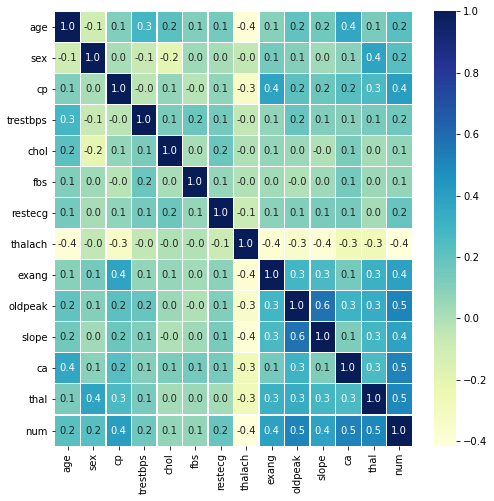

In [18]:
f,ax = plt.subplots(figsize=(8,8))

sns.heatmap(df_cleveland.corr(), annot=True, linewidths=0.1, fmt= '.1f',ax=ax, cmap="YlGnBu")

plt.show()

### LONGBEACH (va)

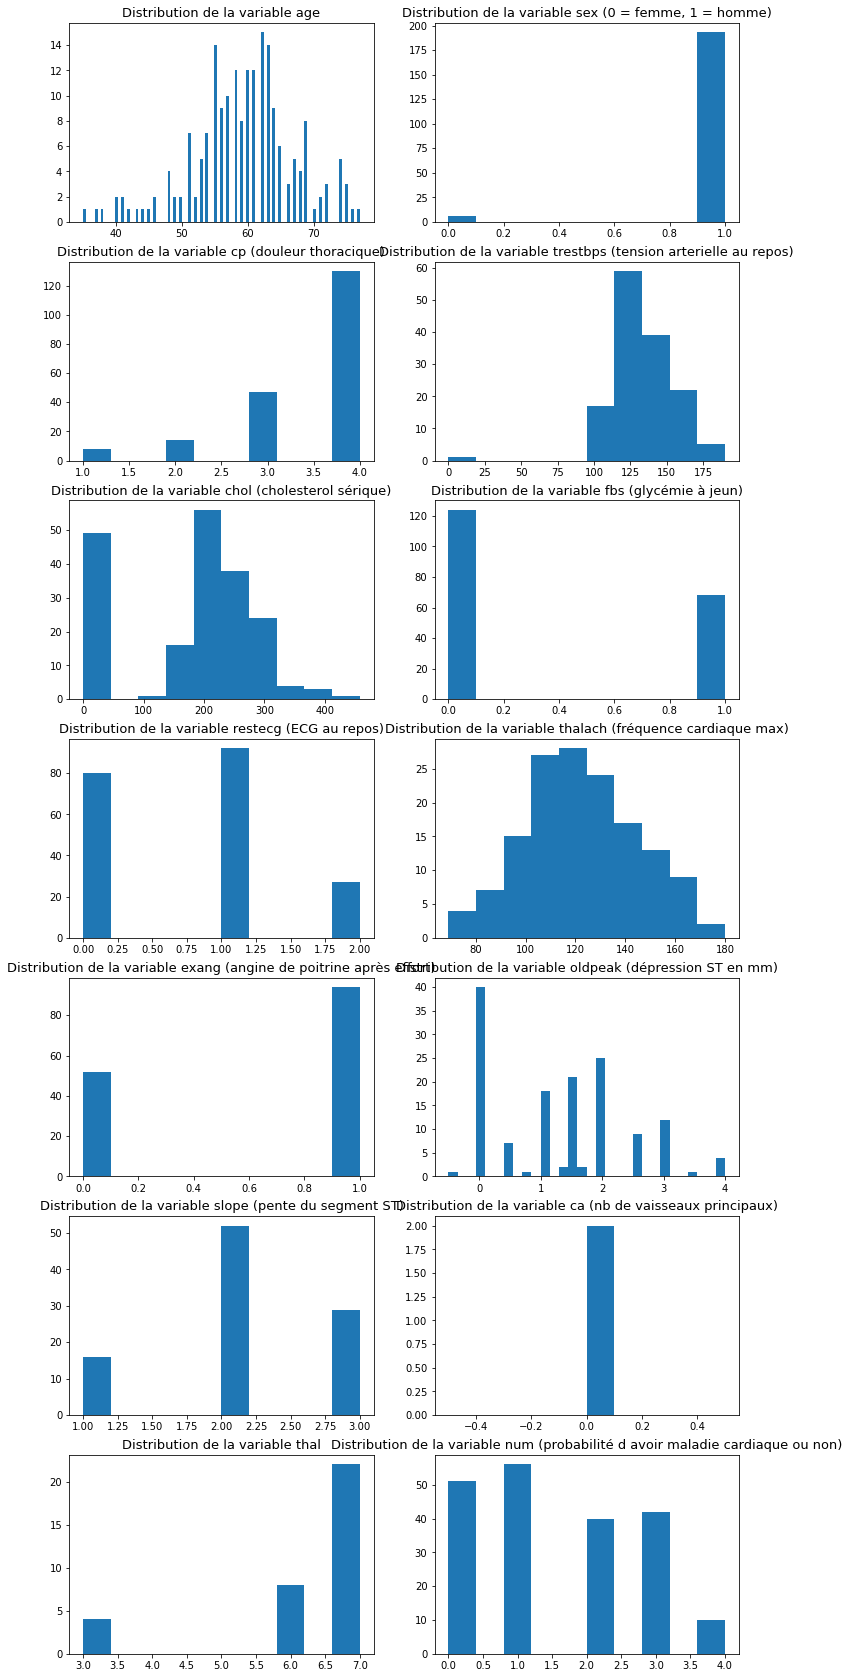

In [19]:
# Distribution des variables (histogramme) :
fig, axes = plt.subplots(7,2)
fig.set_size_inches(12,12)
fig.set_figheight(30)

axes[0,0].hist(df_va['age'].dropna(), bins = 95)
axes[0,0].set_title('Distribution de la variable age', fontsize = 13)

axes[0,1].hist(df_va['sex'].dropna())
axes[0,1].set_title('Distribution de la variable sex (0 = femme, 1 = homme)', fontsize = 13)

axes[1,0].hist(df_va['cp'].dropna())
axes[1,0].set_title('Distribution de la variable cp (douleur thoracique)', fontsize = 13)

axes[1,1].hist(df_va['trestbps'].dropna())
axes[1,1].set_title('Distribution de la variable trestbps (tension arterielle au repos)', fontsize = 13)

axes[2,0].hist(df_va['chol'].dropna())
axes[2,0].set_title('Distribution de la variable chol (cholesterol sérique)', fontsize = 13)

axes[2,1].hist(df_va['fbs'].dropna())
axes[2,1].set_title('Distribution de la variable fbs (glycémie à jeun)', fontsize = 13)

axes[3,0].hist(df_va['restecg'].dropna())
axes[3,0].set_title('Distribution de la variable restecg (ECG au repos)', fontsize = 13)

axes[3,1].hist(df_va['thalach'].dropna())
axes[3,1].set_title('Distribution de la variable thalach (fréquence cardiaque max)', fontsize = 13)

axes[4,0].hist(df_va['exang'].dropna())
axes[4,0].set_title('Distribution de la variable exang (angine de poitrine après effort)', fontsize = 13)

axes[4,1].hist(df_va['oldpeak'].dropna(), bins = 30)
axes[4,1].set_title('Distribution de la variable oldpeak (dépression ST en mm)', fontsize = 13)

axes[5,0].hist(df_va['slope'].dropna())
axes[5,0].set_title('Distribution de la variable slope (pente du segment ST)', fontsize = 13)

axes[5,1].hist(df_va['ca'].dropna())
axes[5,1].set_title('Distribution de la variable ca (nb de vaisseaux principaux)', fontsize = 13)

axes[6,0].hist(df_va['thal'].dropna())
axes[6,0].set_title('Distribution de la variable thal', fontsize = 13)

axes[6,1].hist(df_va['num'].dropna())
axes[6,1].set_title('Distribution de la variable num (probabilité d avoir maladie cardiaque ou non)', fontsize = 13)   
    
plt.show()

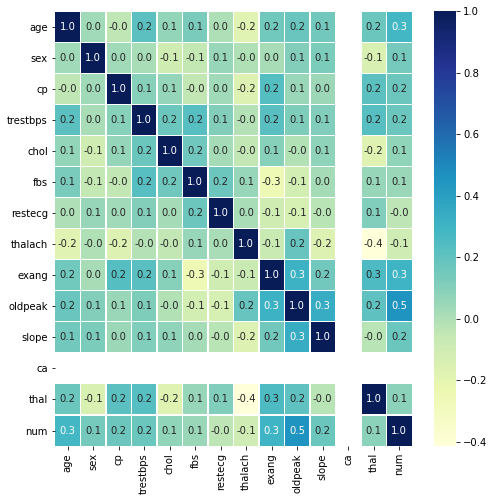

In [20]:
f,ax = plt.subplots(figsize=(8,8))

sns.heatmap(df_va.corr(), annot=True, linewidths=0.1, fmt= '.1f',ax=ax, cmap="YlGnBu")

plt.show()

### HONGRIE

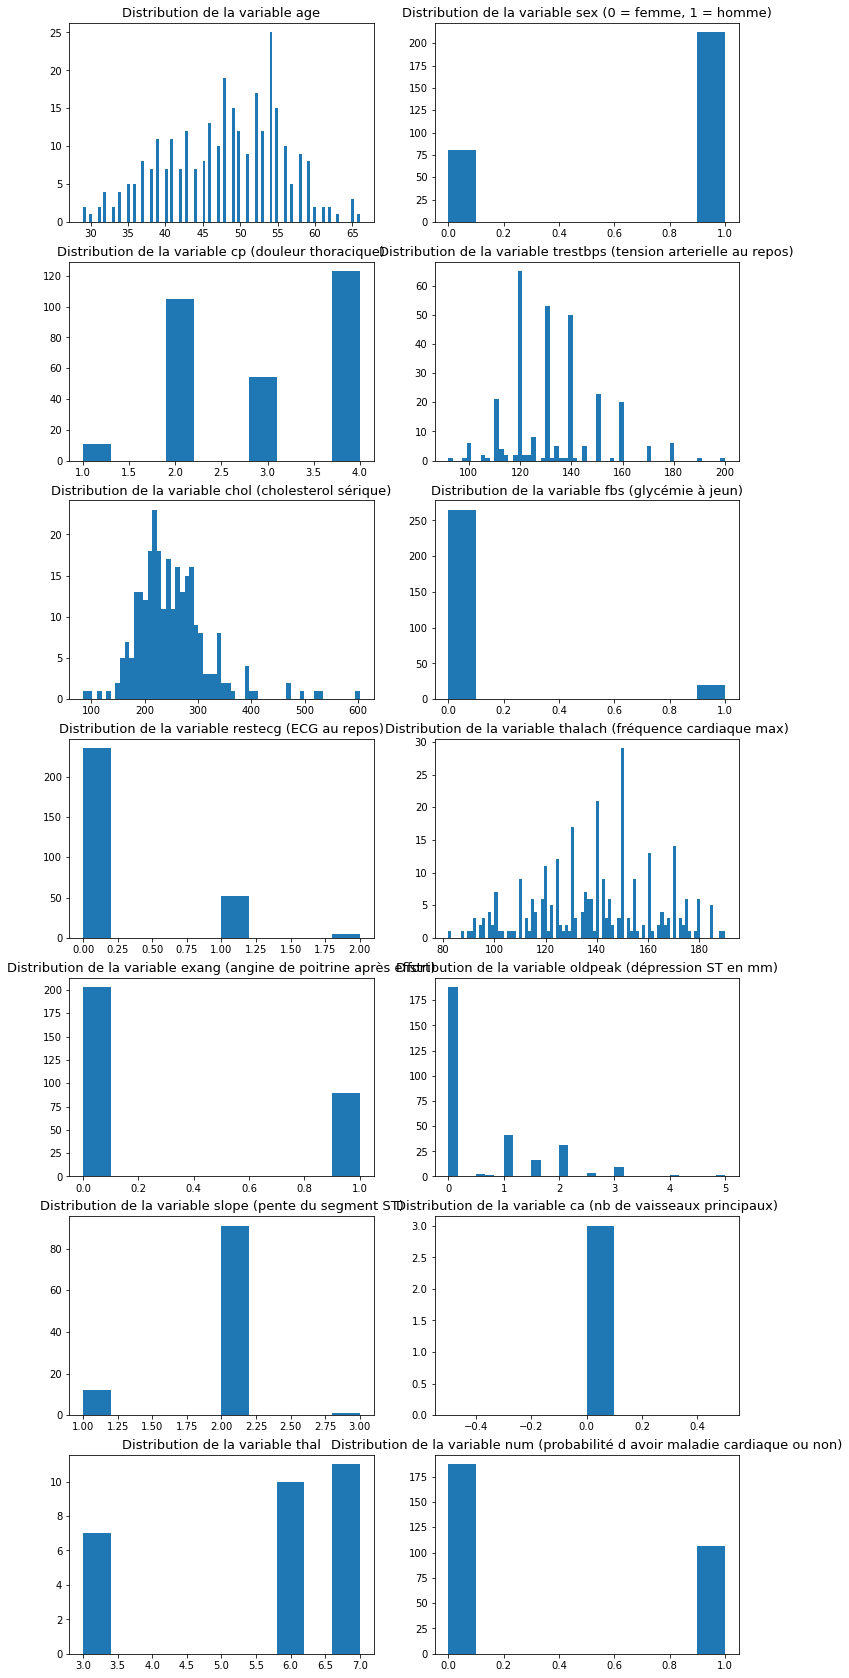

In [21]:
fig, axes = plt.subplots(7,2)
fig.set_size_inches(12,12)
fig.set_figheight(30)


axes[0,0].hist(df_hungarian['age'].dropna(), bins = 95)
axes[0,0].set_title('Distribution de la variable age', fontsize = 13)
 
axes[0,1].hist(df_hungarian['sex'].dropna())
axes[0,1].set_title('Distribution de la variable sex (0 = femme, 1 = homme)', fontsize = 13)

axes[1,0].hist(df_hungarian['cp'].dropna())
axes[1,0].set_title('Distribution de la variable cp (douleur thoracique)', fontsize = 13)

axes[1,1].hist(df_hungarian['trestbps'].dropna(), bins = 60)
axes[1,1].set_title('Distribution de la variable trestbps (tension arterielle au repos)', fontsize = 13)

axes[2,0].hist(df_hungarian['chol'].dropna(), bins = 60)
axes[2,0].set_title('Distribution de la variable chol (cholesterol sérique)', fontsize = 13)

axes[2,1].hist(df_hungarian['fbs'].dropna())
axes[2,1].set_title('Distribution de la variable fbs (glycémie à jeun)', fontsize = 13)

axes[3,0].hist(df_hungarian['restecg'].dropna())
axes[3,0].set_title('Distribution de la variable restecg (ECG au repos)', fontsize = 13)

axes[3,1].hist(df_hungarian['thalach'].dropna(), bins = 90)
axes[3,1].set_title('Distribution de la variable thalach (fréquence cardiaque max)', fontsize = 13) 

axes[4,0].hist(df_hungarian['exang'].dropna())
axes[4,0].set_title('Distribution de la variable exang (angine de poitrine après effort)', fontsize = 13)

axes[4,1].hist(df_hungarian['oldpeak'].dropna(), bins = 30)
axes[4,1].set_title('Distribution de la variable oldpeak (dépression ST en mm)', fontsize = 13)

axes[5,0].hist(df_hungarian['slope'].dropna())
axes[5,0].set_title('Distribution de la variable slope (pente du segment ST)', fontsize = 13)

axes[5,1].hist(df_hungarian['ca'].dropna())
axes[5,1].set_title('Distribution de la variable ca (nb de vaisseaux principaux)', fontsize = 13)

axes[6,0].hist(df_hungarian['thal'].dropna())
axes[6,0].set_title('Distribution de la variable thal', fontsize = 13)

axes[6,1].hist(df_hungarian['num'].dropna())
axes[6,1].set_title('Distribution de la variable num (probabilité d avoir maladie cardiaque ou non)', fontsize = 13)

plt.show()

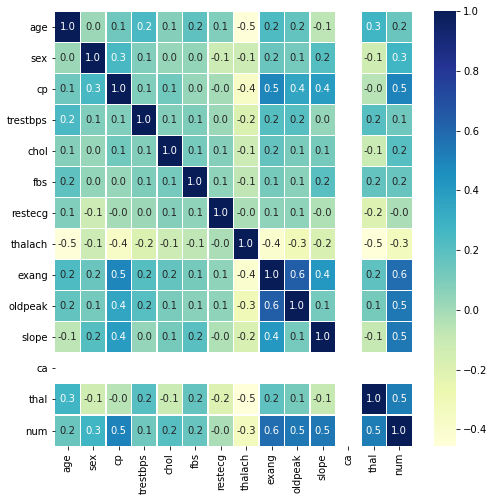

In [22]:
f,ax = plt.subplots(figsize=(8,8))

sns.heatmap(df_hungarian.corr(), annot=True, linewidths=0.1, fmt= '.1f',ax=ax, cmap="YlGnBu")

plt.show()

### SUISSE

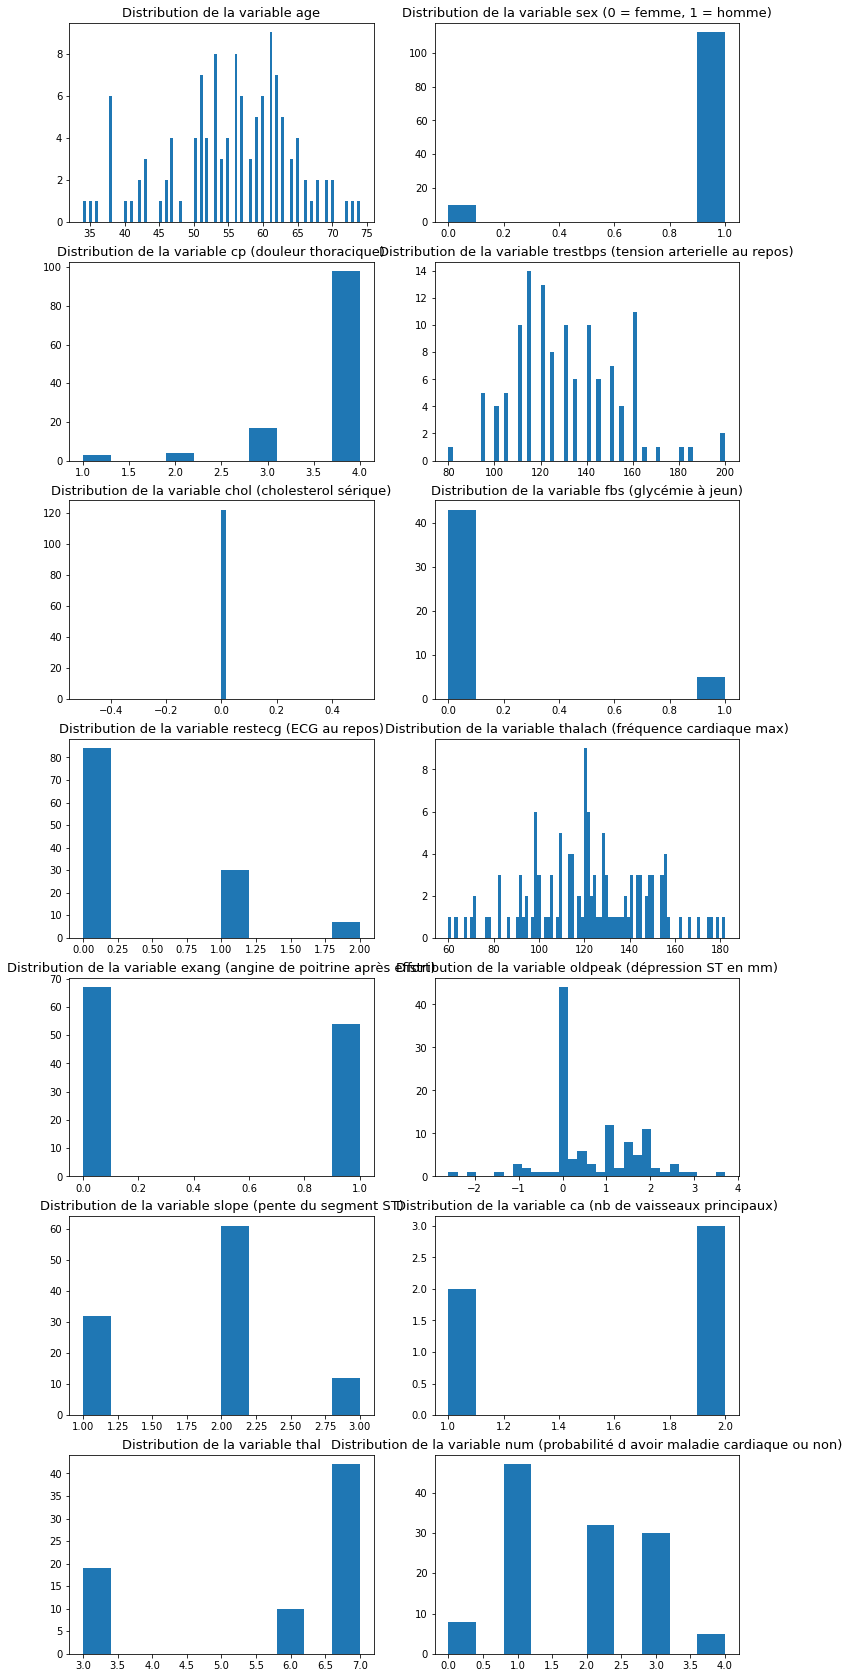

In [23]:
fig, axes = plt.subplots(7,2)
fig.set_size_inches(12,12)
fig.set_figheight(30)


axes[0,0].hist(df_swi['age'].dropna(), bins = 95)
axes[0,0].set_title('Distribution de la variable age', fontsize = 13)
 
axes[0,1].hist(df_swi['sex'].dropna())
axes[0,1].set_title('Distribution de la variable sex (0 = femme, 1 = homme)', fontsize = 13)

axes[1,0].hist(df_swi['cp'].dropna())
axes[1,0].set_title('Distribution de la variable cp (douleur thoracique)', fontsize = 13)

axes[1,1].hist(df_swi['trestbps'].dropna(), bins = 60)
axes[1,1].set_title('Distribution de la variable trestbps (tension arterielle au repos)', fontsize = 13)

axes[2,0].hist(df_swi['chol'].dropna(), bins = 60)
axes[2,0].set_title('Distribution de la variable chol (cholesterol sérique)', fontsize = 13)

axes[2,1].hist(df_swi['fbs'].dropna())
axes[2,1].set_title('Distribution de la variable fbs (glycémie à jeun)', fontsize = 13)

axes[3,0].hist(df_swi['restecg'].dropna())
axes[3,0].set_title('Distribution de la variable restecg (ECG au repos)', fontsize = 13)

axes[3,1].hist(df_swi['thalach'].dropna(), bins = 90)
axes[3,1].set_title('Distribution de la variable thalach (fréquence cardiaque max)', fontsize = 13) 

axes[4,0].hist(df_swi['exang'].dropna())
axes[4,0].set_title('Distribution de la variable exang (angine de poitrine après effort)', fontsize = 13)

axes[4,1].hist(df_swi['oldpeak'].dropna(), bins = 30)
axes[4,1].set_title('Distribution de la variable oldpeak (dépression ST en mm)', fontsize = 13)

axes[5,0].hist(df_swi['slope'].dropna())
axes[5,0].set_title('Distribution de la variable slope (pente du segment ST)', fontsize = 13)

axes[5,1].hist(df_swi['ca'].dropna())
axes[5,1].set_title('Distribution de la variable ca (nb de vaisseaux principaux)', fontsize = 13)

axes[6,0].hist(df_swi['thal'].dropna())
axes[6,0].set_title('Distribution de la variable thal', fontsize = 13)

axes[6,1].hist(df_swi['num'].dropna())
axes[6,1].set_title('Distribution de la variable num (probabilité d avoir maladie cardiaque ou non)', fontsize = 13)

plt.show()

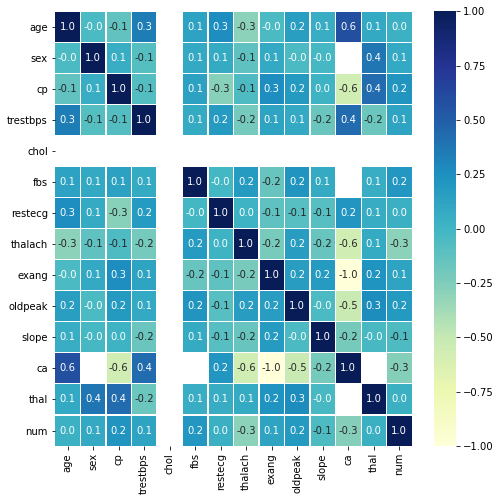

In [24]:
f,ax = plt.subplots(figsize=(8,8))

sns.heatmap(df_swi.corr(), annot=True, linewidths=0.1, fmt= '.1f',ax=ax, cmap="YlGnBu")

plt.show()

### GLOBAL

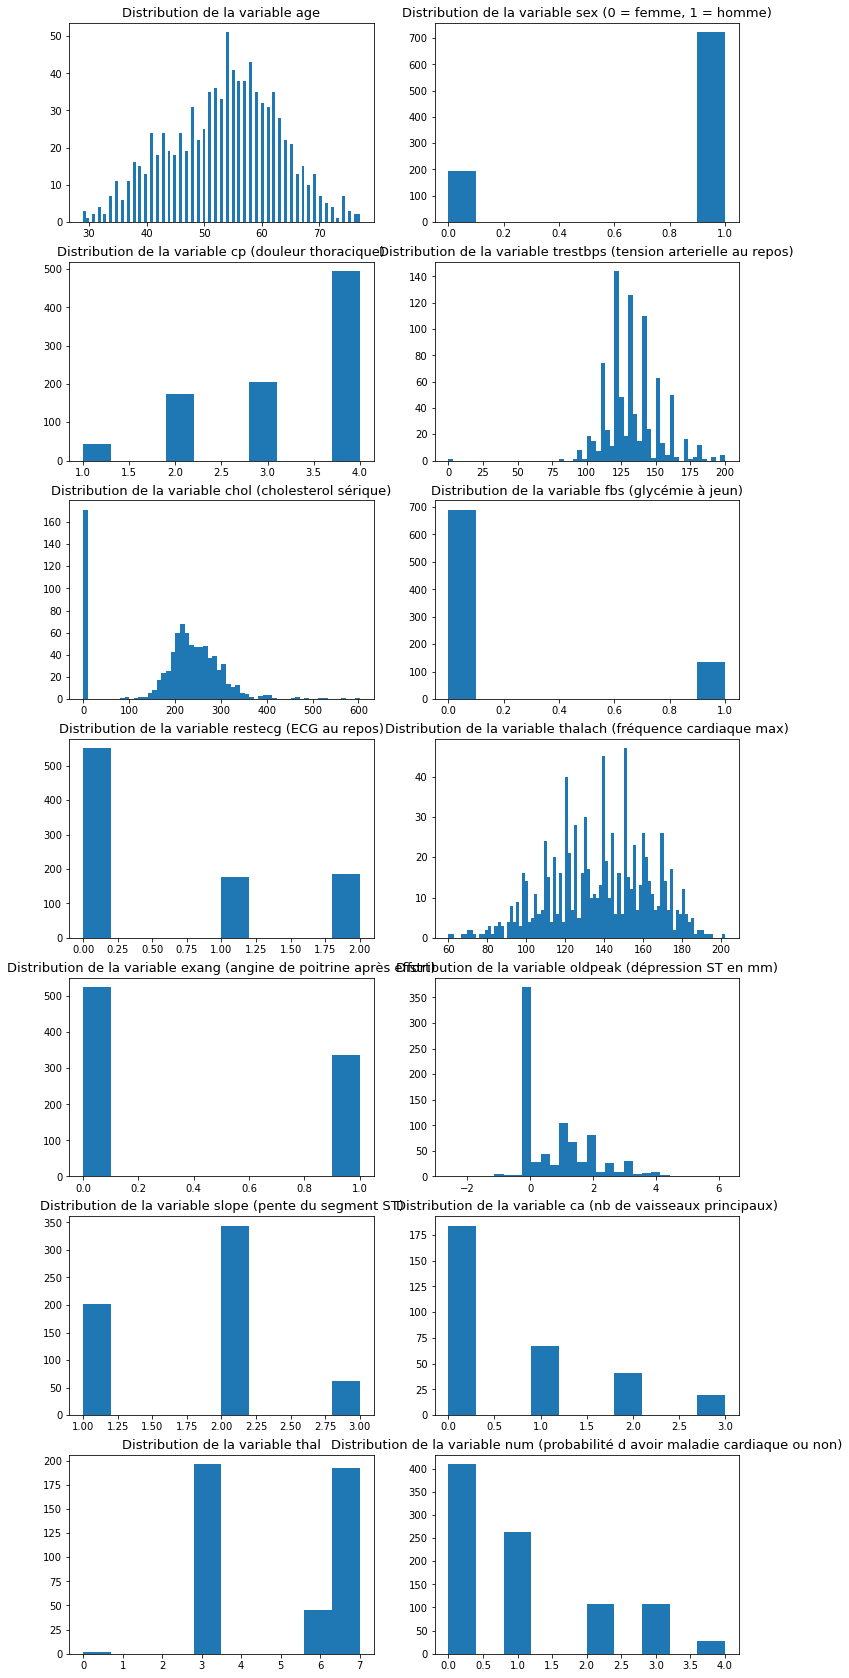

In [25]:
fig, axes = plt.subplots(7,2)
fig.set_size_inches(12,12)
fig.set_figheight(30)

axes[0,0].hist(result['age'].dropna(), bins = 95)
axes[0,0].set_title('Distribution de la variable age', fontsize = 13)
 
axes[0,1].hist(result['sex'].dropna())
axes[0,1].set_title('Distribution de la variable sex (0 = femme, 1 = homme)', fontsize = 13)

axes[1,0].hist(result['cp'].dropna())
axes[1,0].set_title('Distribution de la variable cp (douleur thoracique)', fontsize = 13)

axes[1,1].hist(result['trestbps'].dropna(), bins = 60)
axes[1,1].set_title('Distribution de la variable trestbps (tension arterielle au repos)', fontsize = 13)

axes[2,0].hist(result['chol'].dropna(), bins = 60)
axes[2,0].set_title('Distribution de la variable chol (cholesterol sérique)', fontsize = 13)

axes[2,1].hist(result['fbs'].dropna())
axes[2,1].set_title('Distribution de la variable fbs (glycémie à jeun)', fontsize = 13)

axes[3,0].hist(result['restecg'].dropna())
axes[3,0].set_title('Distribution de la variable restecg (ECG au repos)', fontsize = 13)

axes[3,1].hist(result['thalach'].dropna(), bins = 90)
axes[3,1].set_title('Distribution de la variable thalach (fréquence cardiaque max)', fontsize = 13) 

axes[4,0].hist(result['exang'].dropna())
axes[4,0].set_title('Distribution de la variable exang (angine de poitrine après effort)', fontsize = 13)

axes[4,1].hist(result['oldpeak'].dropna(), bins = 30)
axes[4,1].set_title('Distribution de la variable oldpeak (dépression ST en mm)', fontsize = 13)

axes[5,0].hist(result['slope'].dropna())
axes[5,0].set_title('Distribution de la variable slope (pente du segment ST)', fontsize = 13)

axes[5,1].hist(result['ca'].dropna())
axes[5,1].set_title('Distribution de la variable ca (nb de vaisseaux principaux)', fontsize = 13)

axes[6,0].hist(result['thal'].dropna())
axes[6,0].set_title('Distribution de la variable thal', fontsize = 13)

axes[6,1].hist(result['num'].dropna())
axes[6,1].set_title('Distribution de la variable num (probabilité d avoir maladie cardiaque ou non)', fontsize = 13)

plt.show()

Nous remarquerons que pour la globalité de nos datasets, les données utilisées ne sont pas équilibrées.

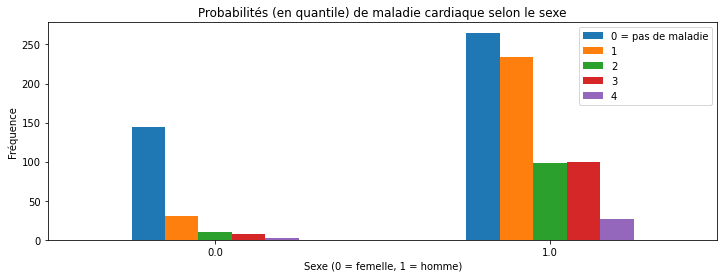

In [26]:
# Exemple de déséquilibre sur nos données globale :

pd.crosstab(result.sex,result.num).plot(kind="bar",figsize=(12,4))
plt.title('Probabilités (en quantile) de maladie cardiaque selon le sexe')
plt.xlabel('Sexe (0 = femelle, 1 = homme)')
plt.xticks(rotation=0)
plt.legend(["0 = pas de maladie", "1", "2", "3", "4"])
plt.ylabel('Fréquence')
plt.show()

# On peut déjà observer un biais de selection si on compare ces histogrammes là par rapport à l'histogramme de la variable sexe
# En effet, moins de femmes ont été observées, donc forcément moins de maladie cardiaque pour les femmes que les hommes

# Modélisation

### Transformation des données manquantes

In [27]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit(result)
result_mf = imp.transform(result)
result_imp = pd.DataFrame(result_mf)

result_imp.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num', 'source']

result_imp.describe()
print(result_imp.dtypes)

age         object
sex         object
cp          object
trestbps    object
chol        object
fbs         object
restecg     object
thalach     object
exang       object
oldpeak     object
slope       object
ca          object
thal        object
num         object
source      object
dtype: object


In [28]:
# Il faut reconvertir les données en numériques
mask = result_imp.columns != 'source'
cols = result_imp.columns[mask]
for i in cols:
    result_imp[i] = pd.to_numeric(result_imp[i], errors = 'coerce')

In [29]:
result_imp.describe()
print(result_imp.dtypes)

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
source       object
dtype: object


In [30]:
result_imp

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,source
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,cleve
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,cleve
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,cleve
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,cleve
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0,cleve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,54.0,0.0,4.0,127.0,333.0,1.0,1.0,154.0,0.0,0.0,2.0,0.0,3.0,1,va
912,62.0,1.0,1.0,120.0,139.0,0.0,1.0,150.0,0.0,0.0,2.0,0.0,3.0,0,va
913,55.0,1.0,4.0,122.0,223.0,1.0,1.0,100.0,0.0,0.0,2.0,0.0,6.0,2,va
914,58.0,1.0,4.0,120.0,385.0,1.0,2.0,150.0,0.0,0.0,2.0,0.0,3.0,0,va


## Implémentation des modèles :

In [31]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [32]:
# Données sélectionnées :
y = result_imp['num']
X = result_imp.drop(['ca', 'thal', 'source'], axis = 1)

In [33]:
# séparation des données :
X_train, X_test = train_test_split(X, test_size = 0.2, random_state = 300)
X_val, X_test = train_test_split(X_test, test_size = 0.5, random_state = 300)

y_train = X_train.loc[:,'num']
y_val = X_val.loc[:,'num']
y_test = X_test.loc[:,'num']

X_train.drop(['num'],axis=1)
X_val.drop(['num'],axis=1)
X_test.drop(['num'],axis=1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
765,42.0,1.0,3.0,134.0,240.0,0.0,0.0,160.0,0.0,0.0,2.0
11,56.0,1.0,3.0,130.0,256.0,1.0,2.0,142.0,1.0,0.6,2.0
867,71.0,1.0,4.0,130.0,221.0,0.0,1.0,115.0,1.0,0.0,2.0
68,46.0,1.0,3.0,150.0,231.0,0.0,0.0,147.0,0.0,3.6,2.0
839,57.0,1.0,4.0,110.0,197.0,0.0,2.0,100.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
785,63.0,1.0,2.0,120.0,217.0,1.0,1.0,150.0,0.0,0.0,2.0
510,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0
534,48.0,1.0,4.0,122.0,275.0,1.0,1.0,150.0,1.0,2.0,3.0
733,46.0,1.0,4.0,110.0,236.0,0.0,0.0,125.0,1.0,2.0,2.0


### Sélection de 3 familles de modèle :

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [35]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
38,61.0,1.0,3.0,150.0,243.0,1.0,0.0,137.0,1.0,1.0,2.0,0
208,62.0,0.0,4.0,150.0,244.0,0.0,0.0,154.0,1.0,1.4,2.0,1
704,65.0,1.0,4.0,160.0,0.0,1.0,1.0,122.0,0.0,0.0,2.0,3
263,61.0,1.0,4.0,138.0,166.0,0.0,2.0,125.0,1.0,3.6,2.0,4
56,41.0,1.0,4.0,110.0,172.0,0.0,2.0,158.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
725,60.0,1.0,2.0,160.0,267.0,1.0,1.0,157.0,0.0,0.5,2.0,1
9,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0
714,72.0,1.0,3.0,160.0,0.0,0.0,2.0,114.0,0.0,1.6,2.0,0
481,59.0,1.0,3.0,130.0,318.0,0.0,0.0,120.0,1.0,1.0,2.0,0


# SANS NORMALISATION DES DONNEES

#### Random Forest

In [36]:
val_results_rf = []
estimators = [10, 50, 100]

for i in estimators:
    model_rf = RandomForestClassifier(n_estimators=i)
    model_rf_i = model_rf.fit(X_train, y_train)
    Yp_val = model_rf_i.predict(X_val)
    accuracy = accuracy_score(y_val,Yp_val)
    precision = precision_score(y_val,Yp_val,average='macro')
    recall = recall_score(y_val,Yp_val,average='macro')
    val_results_rf.append([i,round(accuracy*100,0),round(precision*100,1),round(recall*100,1)])
    
val_results_rf = pd.DataFrame(val_results_rf,columns=['param', 'accuracy', 'precision', 'recall'])
val_results_rf

C:\Users\Thierry\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Thierry\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Thierry\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,param,accuracy,precision,recall
0,10,92.0,71.4,74.8
1,50,96.0,75.3,78.8
2,100,97.0,77.0,80.0


#### Ridge Regression

In [37]:
val_results_rr = []
estimators_rr = [1, 100, 1000]

for i in estimators_rr:
    model_rr = RidgeClassifier(alpha=i)
    model_rr_i = model_rr.fit(X_train, y_train)
    Yp_val_rr = model_rr_i.predict(X_val)
    accuracy = accuracy_score(y_val,Yp_val_rr)
    precision = precision_score(y_val,Yp_val_rr,average='macro')
    recall = recall_score(y_val,Yp_val_rr,average='macro')
    val_results_rr.append([i,round(accuracy*100,0),round(precision*100,1),round(recall*100,1)])
    
val_results_rr = pd.DataFrame(val_results_rr,columns=['param', 'accuracy', 'precision', 'recall'])
val_results_rr

C:\Users\Thierry\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Thierry\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Thierry\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,param,accuracy,precision,recall
0,1,65.0,38.4,46.5
1,100,66.0,38.9,47.3
2,1000,55.0,33.1,35.1


#### K-NN

In [38]:
val_results_knn = []
estimators_knn = [5, 20, 100]

for i in estimators_knn:
    model_knn = KNeighborsClassifier(n_neighbors=i)
    model_knn_i = model_knn.fit(X_train, y_train)
    Yp_val_knn = model_knn_i.predict(X_val)
    accuracy = accuracy_score(y_val,Yp_val_knn)
    precision = precision_score(y_val,Yp_val_knn,average='macro')
    recall = recall_score(y_val,Yp_val_knn,average='macro')
    val_results_knn.append([i,round(accuracy*100,0),round(precision*100,1),round(recall*100,1)])
    
val_results_knn = pd.DataFrame(val_results_knn,columns=['param', 'accuracy', 'precision', 'recall'])
val_results_knn

C:\Users\Thierry\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Thierry\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Thierry\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,param,accuracy,precision,recall
0,5,45.0,18.7,26.5
1,20,45.0,49.4,29.3
2,100,41.0,15.4,24.0


### Trois résultats pour la classification de nos labels :

In [39]:
from sklearn.metrics import confusion_matrix

# résultat de la classification par classe avec le param 10 (meilleur modele) :
model_rf_lab = RandomForestClassifier(10)
model_rf_fit = model_rf.fit(X_train, y_train)
cf_matrix_rf = pd.DataFrame(confusion_matrix(y_val, model_rf_fit.predict(X_val)))
cf_matrix_rf

,0,1,2,3,4
0,34,0,0,0,0
1,0,26,0,0,0
2,0,0,12,0,0
3,0,0,0,17,0
4,0,0,0,3,0


In [40]:
# résultat de la classification par classe pour le Ridge Classifier avec le param 100 (meilleur modele):

model_rr_lab = RidgeClassifier(alpha=100)
model_rr_fit = model_rr.fit(X_train, y_train)
cf_matrix_rr = pd.DataFrame(confusion_matrix(y_val, model_rr_fit.predict(X_val)))
cf_matrix_rr

,0,1,2,3,4
0,34,0,0,0,0
1,14,12,0,0,0
2,4,8,0,0,0
3,0,12,0,5,0
4,0,0,0,3,0


In [41]:
# résultat de la classification par classe pour le KNN avec le param 20 (meilleur modele):

model_knn_lab = KNeighborsClassifier(n_neighbors=20)
model_knn_fit = model_knn_lab.fit(X_train, y_train)
cf_matrix_knn = pd.DataFrame(confusion_matrix(y_val, model_knn_lab.predict(X_val)))
cf_matrix_knn

,0,1,2,3,4
0,27,6,1,0,0
1,16,10,0,0,0
2,6,4,2,0,0
3,7,8,0,2,0
4,0,3,0,0,0


### Réapprentissage sur la combinaison des données val + train et prédictions sur les données test

In [42]:
# train + val jeu de données et utilisations des meilleurs modèles
X_train_val = X_train.append(X_val, ignore_index=True)
y_train_val = y_train.append(y_val, ignore_index=True)

In [43]:
# Random Forest :

model_rf_test = RandomForestClassifier(n_estimators=10)
model_rf_10 = model_rf_test.fit(X_train_val, y_train_val)

Yp_test = model_rf_10.predict(X_test)
accuracy_rf_10 = accuracy_score(Yp_test,y_test)
precision_rf_10 = precision_score(y_test,Yp_test,average='macro')
recall_rf_10 = recall_score(y_test,Yp_test,average='macro')

test_results_rf_10 = [[model_rf_test, round(accuracy_rf_10*100,2), round(precision_rf_10*100,2), round(recall_rf_10*100,2)]]
test_results_rf_10 = pd.DataFrame(test_results_rf_10,columns=['model','acc','pre','rec'])
test_results_rf_10

C:\Users\Thierry\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,model,acc,pre,rec
0,"(DecisionTreeClassifier(max_features='auto', r...",94.57,71.35,77.5


In [44]:
# résultat de la classification par classe :
cf_matrix_rf_test = pd.DataFrame(confusion_matrix(y_test, model_rf_test.predict(X_test)))
cf_matrix_rf_test

,0,1,2,3,4
0,41,0,0,0,0
1,0,30,0,0,0
2,0,0,9,0,0
3,0,0,1,7,0
4,0,1,0,3,0


In [45]:
# Ridge Classifier :

model_rr_test = RidgeClassifier(alpha=100)
model_rr_100 = model_rr_test.fit(X_train_val, y_train_val)

Yp_test = model_rr_100.predict(X_test)
accuracy_rr_100 = accuracy_score(Yp_test,y_test)
precision_rr_100 = precision_score(y_test,Yp_test,average='macro')
recall_rr_100 = recall_score(y_test,Yp_test,average='macro')

test_results_rr_100 = [[model_rr_test, round(accuracy_rr_100*100,2), round(precision_rr_100*100,2), round(recall_rr_100*100,2)]]
test_results_rr_100 = pd.DataFrame(test_results_rr_100,columns=['model','acc','pre','rec'])
test_results_rr_100

C:\Users\Thierry\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,model,acc,pre,rec
0,RidgeClassifier(alpha=100),69.57,40.1,50.0


In [46]:
# résultat de la classification par classe :
cf_matrix_rr_test = pd.DataFrame(confusion_matrix(y_test, model_rr_test.predict(X_test)))
cf_matrix_rr_test

,0,1,2,3,4
0,41,0,0,0,0
1,15,15,0,0,0
2,1,6,0,2,0
3,0,0,0,8,0
4,0,0,0,4,0


In [47]:
# KNN :

model_knn_test = KNeighborsClassifier(n_neighbors=20)
model_knn_20 = model_knn_test.fit(X_train_val, y_train_val)

Yp_test = model_knn_20.predict(X_test)
accuracy_knn20 = accuracy_score(Yp_test,y_test)
precision_knn20 = precision_score(y_test,Yp_test,average='macro')
recall_knn20 = recall_score(y_test,Yp_test,average='macro')

test_results_knn20 = [[model_knn_test, round(accuracy_knn20*100,2), round(precision_knn20*100,2), round(recall_knn20*100,2)]]
test_results_knn20 = pd.DataFrame(test_results_knn20,columns=['model','acc','pre','rec'])
test_results_knn20

C:\Users\Thierry\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,model,acc,pre,rec
0,KNeighborsClassifier(n_neighbors=20),46.74,33.73,25.8


In [48]:
# résultat de la classification par classe :
cf_matrix_knn_test = pd.DataFrame(confusion_matrix(y_test, model_knn_test.predict(X_test)))
cf_matrix_knn_test

,0,1,2,3,4
0,35,4,2,0,0
1,23,6,0,1,0
2,5,3,1,0,0
3,4,3,0,1,0
4,3,1,0,0,0


# AVEC NORMALISATION DES DONNEES

In [49]:
# Normaliser les données
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
X_norm = scaler.fit_transform(X.drop(['num'], axis=1))
X_norm = pd.DataFrame(X_norm)
X_norm.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope']
X_norm['num'] = y
X_norm

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
0,0.791667,1.0,1.000000,0.800,0.474295,0.0,1.0,0.338028,1.0,0.465909,0.5,2
1,0.791667,1.0,1.000000,0.600,0.379768,0.0,1.0,0.485915,1.0,0.590909,0.5,1
2,0.166667,1.0,0.666667,0.650,0.414594,0.0,0.0,0.894366,0.0,0.693182,1.0,0
3,0.250000,0.0,0.333333,0.650,0.338308,0.0,1.0,0.788732,0.0,0.454545,0.0,0
4,0.562500,1.0,0.333333,0.600,0.391376,0.0,0.0,0.830986,0.0,0.386364,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
911,0.520833,0.0,1.000000,0.635,0.552239,1.0,0.5,0.661972,0.0,0.295455,0.5,1
912,0.687500,1.0,0.000000,0.600,0.230514,0.0,0.5,0.633803,0.0,0.295455,0.5,0
913,0.541667,1.0,1.000000,0.610,0.369818,1.0,0.5,0.281690,0.0,0.295455,0.5,2
914,0.604167,1.0,1.000000,0.600,0.638474,1.0,1.0,0.633803,0.0,0.295455,0.5,0


In [50]:
# On garde notre y
y

0      2
1      1
2      0
3      0
4      0
      ..
911    1
912    0
913    2
914    0
915    1
Name: num, Length: 916, dtype: int64

In [51]:
# séparation des données normalisées :
X_train, X_test = train_test_split(X_norm, test_size = 0.2, random_state = 300)
X_val, X_test = train_test_split(X_test, test_size = 0.5, random_state = 300)

y_train = X_train.loc[:,'num']
y_val = X_val.loc[:,'num']
y_test = X_test.loc[:,'num']

X_train.drop(['num'],axis=1)
X_val.drop(['num'],axis=1)
X_test.drop(['num'],axis=1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
765,0.270833,1.0,0.666667,0.67,0.398010,0.0,0.0,0.704225,0.0,0.295455,0.5
11,0.562500,1.0,0.666667,0.65,0.424544,1.0,1.0,0.577465,1.0,0.363636,0.5
867,0.875000,1.0,1.000000,0.65,0.366501,0.0,0.5,0.387324,1.0,0.295455,0.5
68,0.354167,1.0,0.666667,0.75,0.383085,0.0,0.0,0.612676,0.0,0.704545,0.5
839,0.583333,1.0,1.000000,0.55,0.326700,0.0,1.0,0.281690,0.0,0.295455,0.5
...,...,...,...,...,...,...,...,...,...,...,...
785,0.708333,1.0,0.333333,0.60,0.359867,1.0,0.5,0.633803,0.0,0.295455,0.5
510,0.416667,0.0,0.666667,0.80,0.298507,0.0,0.0,0.676056,0.0,0.409091,0.5
534,0.395833,1.0,1.000000,0.61,0.456053,1.0,0.5,0.633803,1.0,0.522727,1.0
733,0.354167,1.0,1.000000,0.55,0.391376,0.0,0.0,0.457746,1.0,0.522727,0.5


### Random Forest

In [52]:
val_results_rf = []
estimators = [10, 50, 100]

for i in estimators:
    model_rf = RandomForestClassifier(n_estimators=i)
    model_rf_i = model_rf.fit(X_train, y_train)
    Yp_val = model_rf_i.predict(X_val)
    accuracy = accuracy_score(y_val,Yp_val)
    precision = precision_score(y_val,Yp_val,average='macro')
    recall = recall_score(y_val,Yp_val,average='macro')
    val_results_rf.append([i,round(accuracy*100,0),round(precision*100,1),round(recall*100,1)])
    
val_results_rf = pd.DataFrame(val_results_rf,columns=['param', 'accuracy', 'precision', 'recall'])
val_results_rf

C:\Users\Thierry\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,param,accuracy,precision,recall
0,10,93.0,74.3,76.0
1,50,98.0,97.9,86.7
2,100,97.0,76.4,80.0


### Ridge Classifier

In [53]:
val_results_rr = []
estimators_rr = [1, 100, 1000]

for i in estimators_rr:
    model_rr = RidgeClassifier(alpha=i)
    model_rr_i = model_rr.fit(X_train, y_train)
    Yp_val_rr = model_rr_i.predict(X_val)
    accuracy = accuracy_score(y_val,Yp_val_rr)
    precision = precision_score(y_val,Yp_val_rr,average='macro')
    recall = recall_score(y_val,Yp_val_rr,average='macro')
    val_results_rr.append([i,round(accuracy*100,0),round(precision*100,1),round(recall*100,1)])
    
val_results_rr = pd.DataFrame(val_results_rr,columns=['param', 'accuracy', 'precision', 'recall'])
val_results_rr

C:\Users\Thierry\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Thierry\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Thierry\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,param,accuracy,precision,recall
0,1,66.0,39.5,47.7
1,100,64.0,37.6,46.2
2,1000,41.0,21.7,24.7


### KNN

In [54]:
val_results_knn = []
estimators_knn = [5, 20, 100]

for i in estimators_knn:
    model_knn = KNeighborsClassifier(n_neighbors=i)
    model_knn_i = model_knn.fit(X_train, y_train)
    Yp_val_knn = model_knn_i.predict(X_val)
    accuracy = accuracy_score(y_val,Yp_val_knn)
    precision = precision_score(y_val,Yp_val_knn,average='macro')
    recall = recall_score(y_val,Yp_val_knn,average='macro')
    val_results_knn.append([i,round(accuracy*100,0),round(precision*100,1),round(recall*100,1)])
    
val_results_knn = pd.DataFrame(val_results_knn,columns=['param', 'accuracy', 'precision', 'recall'])
val_results_knn

C:\Users\Thierry\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,param,accuracy,precision,recall
0,5,100.0,100.0,100.0
1,20,98.0,98.3,92.6
2,100,95.0,75.7,77.6


### Résultats multilabel :

In [55]:
# résultat de la classification par classe avec le param 100 (meilleur modele) :

model_rf_lab = RandomForestClassifier(100)
model_rf_fit = model_rf.fit(X_train, y_train)
cf_matrix_rf = pd.DataFrame(confusion_matrix(y_val, model_rf_fit.predict(X_val)))
cf_matrix_rf

,0,1,2,3,4
0,34,0,0,0,0
1,0,26,0,0,0
2,0,0,12,0,0
3,0,0,0,17,0
4,0,0,0,2,1


In [56]:
# résultat de la classification par classe pour le Ridge Classifier avec le param 1 (meilleur modele):

model_rr_lab = RidgeClassifier(alpha=1)
model_rr_fit = model_rr.fit(X_train, y_train)
cf_matrix_rr = pd.DataFrame(confusion_matrix(y_val, model_rr_fit.predict(X_val)))
cf_matrix_rr

,0,1,2,3,4
0,34,0,0,0,0
1,26,0,0,0,0
2,6,6,0,0,0
3,0,13,0,4,0
4,0,0,0,3,0


In [57]:
# résultat de la classification par classe pour le KNN avec le param 5 (meilleur modele):

model_knn_lab = KNeighborsClassifier(n_neighbors=5)
model_knn_fit = model_knn_lab.fit(X_train, y_train)
cf_matrix_knn = pd.DataFrame(confusion_matrix(y_val, model_knn_lab.predict(X_val)))
cf_matrix_knn

,0,1,2,3,4
0,34,0,0,0,0
1,0,26,0,0,0
2,0,0,12,0,0
3,0,0,0,17,0
4,0,0,0,0,3


### Réapprentissage sur la combinaison des données val + train et prédictions sur les données test normalisées

In [58]:
# train + val jeu de données et utilisations des meilleurs modèles
X_train_val = X_train.append(X_val, ignore_index=True)
y_train_val = y_train.append(y_val, ignore_index=True)

In [59]:
# Random Forest :

model_rf_test = RandomForestClassifier(n_estimators=100)
model_rf_100 = model_rf_test.fit(X_train_val, y_train_val)

Yp_test = model_rf_100.predict(X_test)
accuracy_rf_100 = accuracy_score(Yp_test,y_test)
precision_rf_100 = precision_score(y_test,Yp_test,average='macro')
recall_rf_100 = recall_score(y_test,Yp_test,average='macro')

test_results_rf_100 = [[model_rf_test, round(accuracy_rf_100*100,2), round(precision_rf_100*100,2), round(recall_rf_100*100,2)]]
test_results_rf_100 = pd.DataFrame(test_results_rf_100,columns=['model','acc','pre','rec'])
test_results_rf_100

,model,acc,pre,rec
0,"(DecisionTreeClassifier(max_features='auto', r...",96.74,94.55,85.0


In [60]:
# résultat de la classification par classe :
cf_matrix_rf_test = pd.DataFrame(confusion_matrix(y_test, model_rf_test.predict(X_test)))
cf_matrix_rf_test

,0,1,2,3,4
0,41,0,0,0,0
1,0,30,0,0,0
2,0,0,9,0,0
3,0,0,0,8,0
4,0,0,0,3,1


In [61]:
# Ridge Classifier :

model_rr_test = RidgeClassifier(alpha=1)
model_rr_1 = model_rr_test.fit(X_train_val, y_train_val)

Yp_test = model_rr_1.predict(X_test)
accuracy_rr_1 = accuracy_score(Yp_test,y_test)
precision_rr_1 = precision_score(y_test,Yp_test,average='macro')
recall_rr_1 = recall_score(y_test,Yp_test,average='macro')

test_results_rr_1 = [[model_rr_test, round(accuracy_rr_1*100,2), round(precision_rr_1*100,2), round(recall_rr_1*100,2)]]
test_results_rr_1 = pd.DataFrame(test_results_rr_1,columns=['model','acc','pre','rec'])
test_results_rr_1

C:\Users\Thierry\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,model,acc,pre,rec
0,RidgeClassifier(alpha=1),68.48,39.02,49.69


In [62]:
# résultat de la classification par classe :
cf_matrix_rr_test = pd.DataFrame(confusion_matrix(y_test, model_rr_test.predict(X_test)))
cf_matrix_rr_test

,0,1,2,3,4
0,39,2,0,0,0
1,14,16,0,0,0
2,1,5,0,3,0
3,0,0,0,8,0
4,0,0,0,4,0


In [63]:
# KNN :

model_knn_test = KNeighborsClassifier(n_neighbors=5)
model_knn_5 = model_knn_test.fit(X_train_val, y_train_val)

Yp_test = model_knn_5.predict(X_test)
accuracy_knn5 = accuracy_score(Yp_test,y_test)
precision_knn5 = precision_score(y_test,Yp_test,average='macro')
recall_knn5 = recall_score(y_test,Yp_test,average='macro')

test_results_knn5 = [[model_knn_test, round(accuracy_knn5*100,2), round(precision_knn5*100,2), round(recall_knn5*100,2)]]
test_results_knn5 = pd.DataFrame(test_results_knn5,columns=['model','acc','pre','rec'])
test_results_knn5

,model,acc,pre,rec
0,KNeighborsClassifier(),100.0,100.0,100.0


In [64]:
# résultat de la classification par classe :
cf_matrix_knn_test = pd.DataFrame(confusion_matrix(y_test, model_knn_test.predict(X_test)))
cf_matrix_knn_test

,0,1,2,3,4
0,41,0,0,0,0
1,0,30,0,0,0
2,0,0,9,0,0
3,0,0,0,8,0
4,0,0,0,0,4


# Principal Component Analysis

In [70]:
# Reduction avec l'ACP
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn import decomposition
# Reduction avec l'ACP
# Création du modèle
pca = decomposition.PCA(n_components=2) # Réduction de notre dataframe result_imp en 2 dimensions
# Apprentissage
components = pca.fit_transform(result_imp.drop(['num','source','chol','slope'], axis = 1))
# Transformation en dataframe  
X_red = pd.DataFrame(components,columns = ['principal component 1', 'principal component 2'],index=result_imp.index)
# Récupération des catégories pour la visualisation
X_red = pd.merge(X_red,result_imp,how='left',left_index=True,right_index=True)

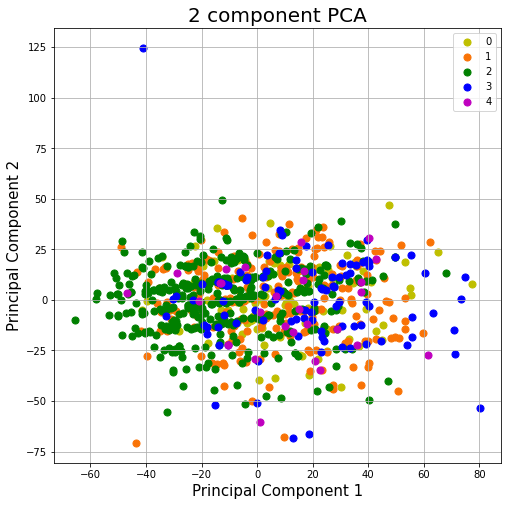

In [71]:
# Projection en 2 dimensions de notre jeu de données :

import matplotlib.pyplot as plt
import matplotlib.lines as plt_l
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
labels = X_red.num.unique()
labels_text = {0:'absence de maladie retrecissement du diametre < 50% ',1:'risque faible de presence de la maladie #PM',2:'risque moyen PM',3:'risque fort de PM',4:'risque tres fort de PM'}
colors = {0:'g',1:'xkcd:orange',2:'y',3:'b',4:'m'}
for label_i in labels:
    indicesToKeep = X_red['num'] == label_i
    ax.scatter(X_red.loc[indicesToKeep, 'principal component 1'], X_red.loc[indicesToKeep, 'principal component 2']
               , c = colors[label_i], s = 50,label=labels_text[label_i])
ax.legend(labels_text)
ax.grid()

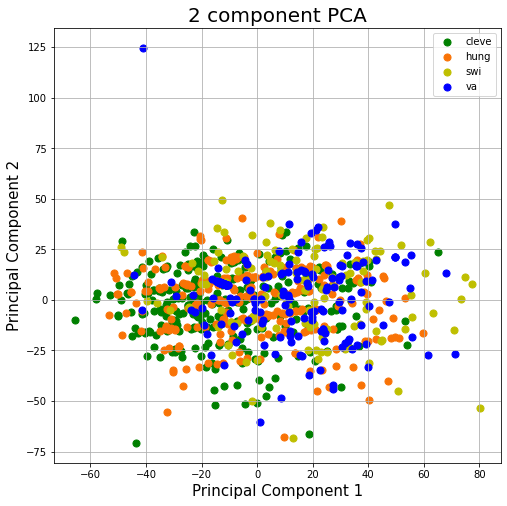

In [72]:
# Projection de la source en 2 dimensions

import matplotlib.pyplot as plt
import matplotlib.lines as plt_l
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
labels = X_red.source.unique()

colors = {'cleve':'g','hung':'xkcd:orange','swi':'y','va':'b'}
for label_i in labels:
    indicesToKeep = X_red['source'] == label_i
    ax.scatter(X_red.loc[indicesToKeep, 'principal component 1'], X_red.loc[indicesToKeep, 'principal component 2']
               , c = colors[label_i], s = 50,label=label_i)
ax.legend(labels)
ax.grid()

In [68]:
import sklearn.decomposition as sk_de
from sklearn.decomposition import PCA
# part de la variance expliquée
pca2 = sk_de.PCA(n_components=5)
# Apprentissage
components = pca2.fit_transform(X_norm.drop(['num'],axis=1))
explained_var = [round(x*100,0) for x in pca2.explained_variance_ratio_]
explained_var = pd.DataFrame(explained_var,['compo_{}'.format(x) for x in range(1,6)])
explained_var.rename(columns={0:'variance_explained'},inplace=True)
explained_var

,variance_explained
compo_1,29.0
compo_2,18.0
compo_3,16.0
compo_4,12.0
compo_5,8.0


In [73]:
# la part de variance expliquée est la plus forte pour le modèle à 1 dimension

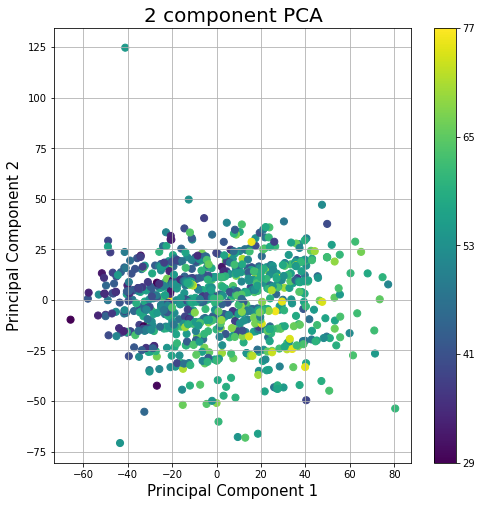

In [69]:
# Représentation selon une des variables d'entrée
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
points = ax.scatter(X_red.loc[:,'principal component 1'], X_red.loc[:, 'principal component 2']
               , c = X_red.loc[:,'age'], s = 50)
v1 = np.linspace(X_red.loc[:,'age'].min(),X_red.loc[:,'age'].max(),5, endpoint=True)
cb = fig.colorbar(points,ticks=v1)

ax.grid()